In [36]:
!pip install pandas numpy
!pip install lxml

In [37]:
import numpy as np
import pandas as pd

## 1. Extract the data (from wikipedia)through web scraping from the following url:

In [39]:
URL = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)" # we will extract from here

Adjustments:

In [41]:
#extract tables using pandas, keep number 2 as the required dataframe

# Use match to find the table with "World" in the first row
tables = pd.read_html(URL, match="World") 


df = tables[0] # get the first and likley only table

#replace column headers with column numbers
df.columns = range(df.shape[1])

#retain columns with index 0 and 1 (country, IMF gdp)
df = df[[0,1]]

#remove the first row (World) and any rows with NaN values
df=df.iloc[1:].dropna()

#retain rows with index 0 to 9, indicating the top 10 economies
df = df.iloc[0:10]

#assign column names
df.columns = ['Country','GDP(Million USD)']

df

,Country,GDP(Million USD)
1,United States,30337162
2,China,19534894
3,Germany,4921563
4,Japan,4389326
5,India,4271922
6,United Kingdom,3730261
7,France,3283429
8,Italy,2459597
9,Canada,2330308
10,Brazil,2307162


In [42]:
# change data type from 'GDP (Million USD) column to an integer. 
df['GDP(Million USD)'] = df['GDP(Million USD)'].astype(int)

# convert from Million to Billion 
df[['GDP(Million USD)']] = df[['GDP(Million USD)']]/1000

#round 2 decimals using numpy
df[['GDP(Million USD)']] = np.round(df[['GDP(Million USD)']],0)

# rename column header to Billion
df.rename(columns = {'GDP(Million USD)': 'GDP(Billion USD)'}, inplace=True)

df


,Country,GDP(Billion USD)
1,United States,30337.0
2,China,19535.0
3,Germany,4922.0
4,Japan,4389.0
5,India,4272.0
6,United Kingdom,3730.0
7,France,3283.0
8,Italy,2460.0
9,Canada,2330.0
10,Brazil,2307.0


In [43]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'GDP(Billion USD)')

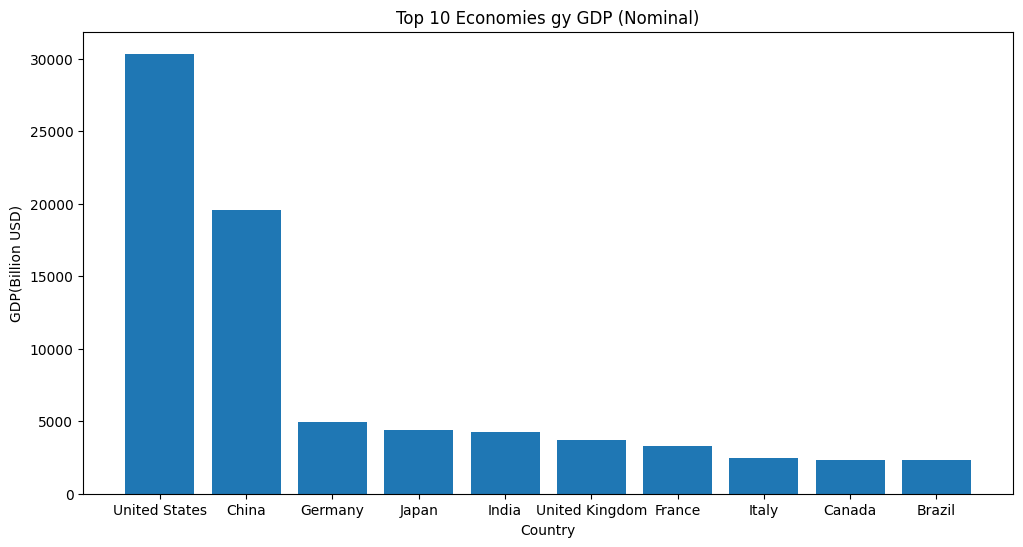

In [76]:
plt.figure(figsize=(12,6))
plt.bar(df['Country'],df['GDP(Billion USD)'])
plt.title("Top 10 Economies gy GDP (Nominal)")
plt.xlabel("Country")
plt.ylabel("GDP(Billion USD)")